In [116]:
import pandas as pd

<H3>Заванатажуємо дані по клієнтах та рахунках

In [117]:
df_customers = pd.read_csv("dataset/customers.csv", sep=";", decimal=',')
df_invoice = pd.read_csv("dataset/invoice.csv", sep=";", decimal=',')

In [118]:
df_customers

,ID,Клієнт,Логін,Посада
0,123123,Клієнт 1,111@mail.com,HR (специалист)
1,123123,Клієнт 1,111@mail.com,Юрист (юрисконсульт)
2,123123,Клієнт 1,111@mail.com,Бухгалтер (специалист)
3,123123,Клієнт 1,111@mail.com,Бухгалтер (главный бухгалтер)
4,123123,Клієнт 1,111@mail.com,Юрист (партнер юр.компании)
...,...,...,...,...
76,234621,Клієнт 56,166@mail.com,Юрист (юрисконсульт)
77,234622,Клієнт 57,167@mail.com,Бухгалтер (специалист)
78,234623,Клієнт 58,168@mail.com,Бухгалтер (главный бухгалтер)
79,234624,Клієнт 59,169@mail.com,Юрист (партнер юр.компании)


Мерджемо дві таблиці в одну (inner) по ID

In [119]:
df_task = pd.merge(df_customers, df_invoice, how='inner', on = 'ID')

In [120]:
df_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             81 non-null     int64  
 1   Клієнт_x       81 non-null     object 
 2   Логін          81 non-null     object 
 3   Посада         81 non-null     object 
 4   Канал продажу  81 non-null     object 
 5   Клієнт_y       81 non-null     object 
 6   Прайс          81 non-null     object 
 7   Номер рахунку  81 non-null     int64  
 8   Рік_місяць     81 non-null     object 
 9   Сегмент        81 non-null     object 
 10  Сума           81 non-null     float64
dtypes: float64(1), int64(2), object(8)
memory usage: 7.1+ KB


![alt text](image.png)

<H5>Завдання 1.1

In [121]:
possition = 'LIGA360' # Фільтр для прайсу
period = '2025.05' # Фільтр для дати

#агрегуємо в таблицю відповідно до завдання 1
df_task1 = df_task[df_task['Прайс'].str.contains(possition) & 
                   df_task['Рік_місяць'].str.contains(period)].groupby(
                       ['Канал продажу', 'Посада'], as_index=False).agg(
                           count_customers= ('Логін','nunique'),
                           revenue= ('Сума','sum'),
                           aov= ('Сума','mean')).sort_values(
                               ['Канал продажу', 'count_customers'], ascending=[True, False]).round(0)
# перейменовуємо поля
df_task1.columns=['Канал продажу',
                  'Посада',
                  'К-ть користувачів',
                  'Сума, євро',
                  'Середній чек']
df_task1

,Канал продажу,Посада,К-ть користувачів,"Сума, євро",Середній чек
0,Держ регіональні,CEO / Руководитель компании,1,254.0,254.0
1,Держ регіональні,HR (специалист),1,254.0,254.0
2,Держ регіональні,Судья,1,254.0,254.0
3,Держ регіональні,Юрист (руководитель юр.департамента),1,254.0,254.0
5,Дилерська мережа,HR (специалист),2,762.0,381.0
7,Дилерська мережа,Бухгалтер (специалист),2,762.0,381.0
11,Дилерська мережа,Юрист (юрисконсульт),2,762.0,381.0
4,Дилерська мережа,CEO / Руководитель компании,1,127.0,127.0
6,Дилерська мережа,Бухгалтер (главный бухгалтер),1,635.0,635.0
8,Дилерська мережа,Юрист (партнер юр.компании),1,635.0,635.0


<H5>Завдання 1.2

In [122]:
possition = 'ClientDay' # Фільтр для прайсу
period = '2025.06' # Фільтр для дати

#агрегуємо в таблицю відповідно до завдання 1
df_task2 = df_task[df_task['Прайс'].str.contains(possition) & 
                   df_task['Рік_місяць'].str.contains(period)].groupby(
                       ['Сегмент', 'Посада'], as_index=False).agg(
                           count_customers= ('Логін','nunique'),
                           revenue= ('Сума','sum'),
                           aov= ('Сума','mean')).sort_values(
                               ['Сегмент', 'count_customers'], ascending=[True, False]).round(0)
# перейменовуємо поля
df_task2.columns=['Сегмент',
                  'Посада',
                  'К-ть користувачів',
                  'Сума, євро',
                  'Середній чек']
df_task2

,Сегмент,Посада,К-ть користувачів,"Сума, євро",Середній чек
0,ГОС БЮДЖЕТ,Другое,1,76.0,76.0
1,ГОС БЮДЖЕТ,Юрист (специалист юр.компании),1,76.0,76.0
3,ГОС ВЛАСТЬ,Юрист (специалист юр.компании),2,152.0,76.0
2,ГОС ВЛАСТЬ,Судья,1,76.0,76.0
5,ГОСПРЕДПРИЯТИЕ,Юрист (юрисконсульт),2,152.0,76.0
4,ГОСПРЕДПРИЯТИЕ,Бухгалтер (специалист),1,76.0,76.0
6,КРУПНЫЙ БИЗНЕС,HR (специалист),1,381.0,381.0
7,КРУПНЫЙ БИЗНЕС,Бухгалтер (главный бухгалтер),1,381.0,381.0
8,КРУПНЫЙ БИЗНЕС,Другое,1,381.0,381.0
9,КРУПНЫЙ БИЗНЕС,ИТ (специалист),1,381.0,381.0


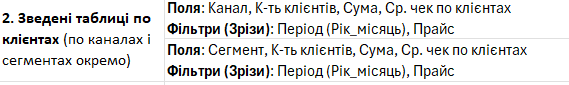

<H5>Завадання 2.1

In [123]:
possition = 'ClientDay' # Фільтр для прайсу
period = '2025.06' # Фільтр для дати

#агрегуємо в таблицю відповідно до завдання 1
df_task3 = df_task[df_task['Прайс'].str.contains(possition) & 
                   df_task['Рік_місяць'].str.contains(period)].groupby(
                       'Канал продажу', as_index=False).agg(
                           count_customers= ('Логін','nunique'),
                           revenue= ('Сума','sum'),
                           aov= ('Сума','mean')).sort_values(
                               ['Канал продажу', 'count_customers'], ascending=[True, False]).round(0)
# перейменовуємо поля
df_task3.columns=['Канал продажу',
                  'К-ть користувачів',
                  'Сума, євро',
                  'Середній чек']
df_task3

,Канал продажу,К-ть користувачів,"Сума, євро",Середній чек
0,Держ регіональні,5,381.0,76.0
1,Держ центральні,3,229.0,76.0
2,Дилерська мережа,5,381.0,76.0
3,Корп клієнти,3,2057.0,294.0
4,Нові продажі,1,76.0,76.0
5,ЮрАудит бізнес,4,305.0,76.0


<H5>Завдяння 2.2

In [124]:
possition = 'ClientDay' # Фільтр для прайсу
period = '2025.06' # Фільтр для дати

#агрегуємо в таблицю відповідно до завдання 1
df_task4 = df_task[df_task['Прайс'].str.contains(possition) & 
                   df_task['Рік_місяць'].str.contains(period)].groupby(
                       'Сегмент', as_index=False).agg(
                           count_customers= ('Логін','nunique'),
                           revenue= ('Сума','sum'),
                           aov= ('Сума','mean')).sort_values(
                               ['Сегмент', 'count_customers'], ascending=[True, False]).round(0)
# перейменовуємо поля
df_task4.columns=['Сегмент',
                  'К-ть користувачів',
                  'Сума, євро',
                  'Середній чек']
df_task4

,Сегмент,К-ть користувачів,"Сума, євро",Середній чек
0,ГОС БЮДЖЕТ,2,152.0,76.0
1,ГОС ВЛАСТЬ,3,229.0,76.0
2,ГОСПРЕДПРИЯТИЕ,3,229.0,76.0
3,КРУПНЫЙ БИЗНЕС,1,1905.0,381.0
4,МАЛЫЙ БИЗНЕС,4,305.0,76.0
5,МАЛЫЙ БУХ.-АУДИТ. БИЗНЕС,1,76.0,76.0
6,МАЛЫЙ ЮР. БИЗНЕС,2,152.0,76.0
7,СРЕДНИЙ БИЗНЕС,3,229.0,76.0
8,ФИЗ.ЛИЦО-ПРЕДПРИНИМАТЕЛЬ,2,152.0,76.0
